In [1]:
import torch
import pyro
import pyro.distributions as dist
from chirho.observational.handlers import condition
import matplotlib.pyplot as plt

single 10.0 3.3333333333333335
tensor(0.0101) tensor(0.0400) tensor(0.0898)


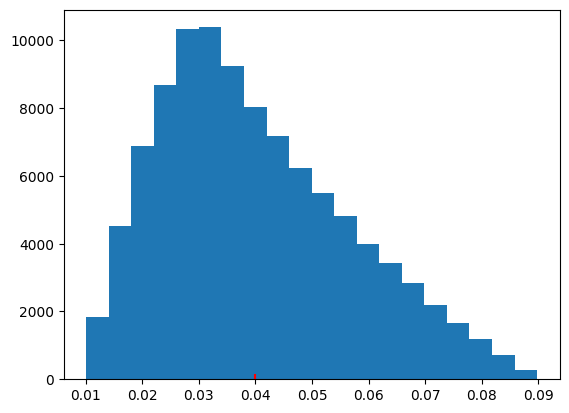

tensor(11.1386) tensor(30.1494) tensor(99.4161)


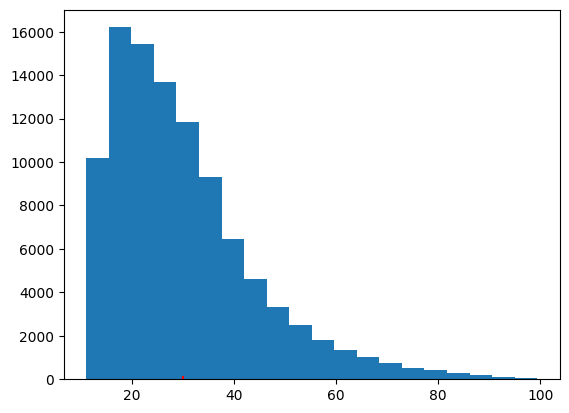

triple
tensor(37.6547) tensor(165.2252) tensor(964.7997)


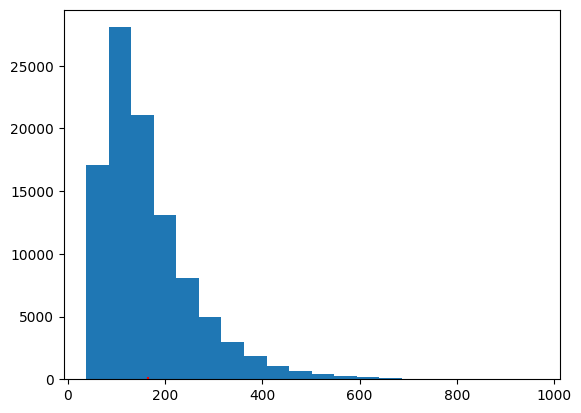

In [2]:
def imprecise_composition():
    Aprob = pyro.sample("Aprob", dist.Uniform(.1,.3))
    Bprob = pyro.sample("Bprob", dist.Uniform(.1,.3))
    Cprob = pyro.sample("Cprob", dist.Uniform(.1,.3))
    
    ABprob = pyro.deterministic("ABprob", Aprob * Bprob)
    
    lh = pyro.deterministic("lh", 1/ABprob)

    lh3 = pyro.deterministic("lh3", 1/(Aprob * Bprob * Cprob))

with pyro.poutine.trace() as prior:
    with pyro.plate("prior", 100000):
        imprecise_composition()
 
print("single", 1/.1, 1/.3)

abprob = prior.trace.nodes['ABprob']['value']
print(torch.min(abprob), torch.mean(abprob), torch.max(abprob))        
plt.hist(abprob, bins=20)
plt.vlines(torch.mean(abprob), 0, 150, color='r')
plt.show()


lh = prior.trace.nodes['lh']['value']
print(torch.min(lh), torch.mean(lh), torch.max(lh))

range_interval_joint = torch.max(lh) - torch.min(lh)

plt.hist(lh, bins=20)
plt.vlines(torch.mean(lh), 0, 150, color='r')
plt.show()

print("triple")
lh3 = prior.trace.nodes['lh3']['value']
print(torch.min(lh3), torch.mean(lh3), torch.max(lh3))
range_interval_triple = torch.max(lh3) - torch.min(lh3)
plt.hist(lh3, bins=20)
plt.vlines(torch.mean(lh3), 0, 150, color='r')
plt.show()


tensor(0.1014) tensor(0.1829) tensor(0.2870)
tensor(29.8852)
tensor(163.3745)


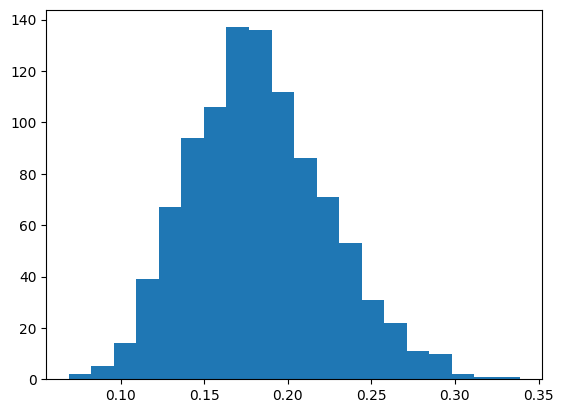

In [6]:
with pyro.plate("testing_a_b", 1000):
    b = pyro.sample("b", dist.Beta(16,71))

plt.hist(b, bins=20)
print(torch.quantile(b, 0.01), torch.mean(b), torch.quantile(b, 0.99))
print(torch.pow(1/torch.mean(b),2))
print(torch.pow(1/torch.mean(b),3))


tensor(0.0143) tensor(0.0338) tensor(0.0648)


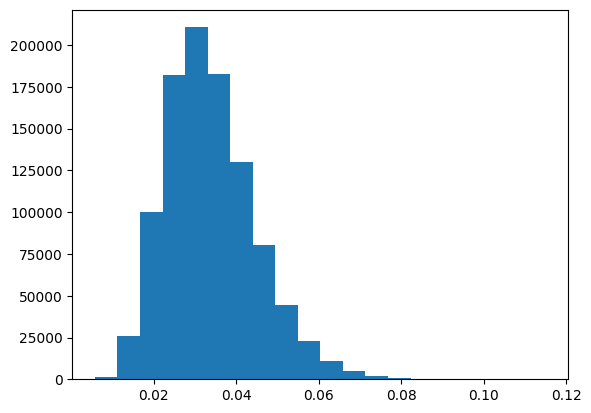

single
tensor(3.4490) tensor(5.7335) tensor(10.0717)


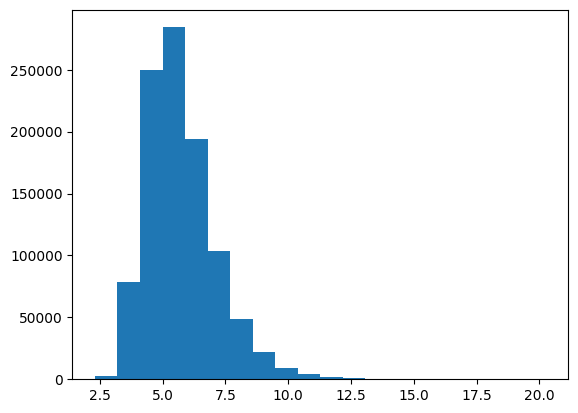

joint
tensor(15.4372) tensor(32.8773) tensor(70.0319)


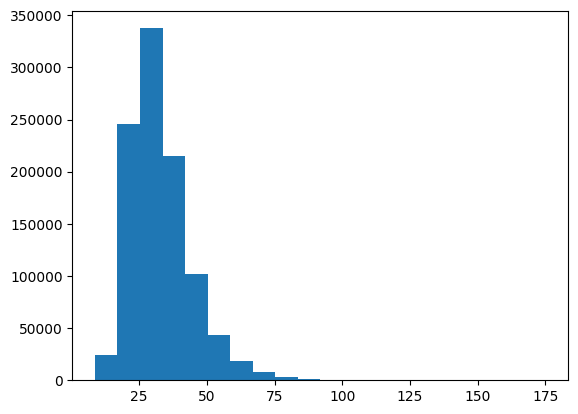

triple
tensor(72.5577) tensor(188.4705) tensor(464.2845)


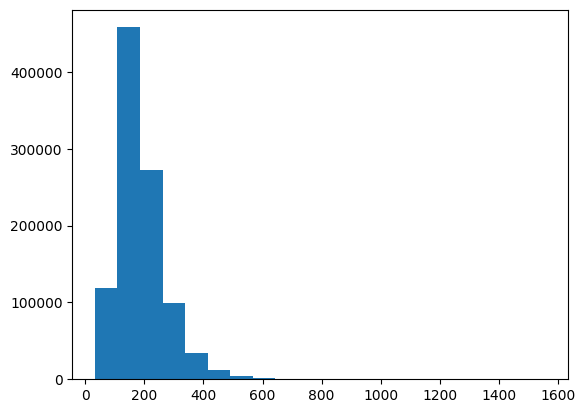

In [4]:
def beta_composition():
    Aprob = pyro.sample("Aprob", dist.Beta(16,71))
    Bprob = pyro.sample("Bprob", dist.Beta(16,71))
    Cprob = pyro.sample("Cprob", dist.Beta(16,71))
    
    ABprob = pyro.deterministic("ABprob", Aprob * Bprob)
    
    single_lh = pyro.deterministic("single_lh", 1/Aprob)
    lh = pyro.deterministic("lh", 1/ABprob)

    lh3 = pyro.deterministic("lh3", 1/(Aprob * Bprob * Cprob))
    
with pyro.poutine.trace() as prior:
    with pyro.plate("prior", 1000000):
        beta_composition()



abprob = prior.trace.nodes['ABprob']['value']
print(torch.quantile(abprob, 0.01), torch.mean(abprob), torch.quantile(abprob, 0.99))
plt.hist(abprob, bins=20)
plt.vlines(torch.mean(abprob), 0, 150, color='r')
plt.show()

print("single")
single_lh = prior.trace.nodes['single_lh']['value']
print(torch.quantile(single_lh, 0.01), torch.mean(single_lh), torch.quantile(single_lh, 0.99))
plt.hist(single_lh, bins=20)
plt.show()

print("joint")
lh = prior.trace.nodes['lh']['value']
print(torch.quantile(lh, 0.01), torch.mean(lh), torch.quantile(lh, 0.99))
range_beta_joint = torch.quantile(lh, 0.99) - torch.quantile(lh, 0.01)
plt.hist(lh, bins=20)
plt.show()

print("triple")
lh3 = prior.trace.nodes['lh3']['value']
range_beta_triple = torch.quantile(lh3, 0.99) - torch.quantile(lh3, 0.01)
print(torch.quantile(lh3, 0.01), torch.mean(lh3), torch.quantile(lh3, 0.99))
plt.hist(lh3, bins=20)
plt.show()


In [5]:
print(range_interval_joint/range_beta_joint, range_interval_triple/range_beta_triple)

tensor(1.6170) tensor(2.3668)
